<a href="https://colab.research.google.com/github/ohmyhat/ohmyhat/blob/main/_Uranium_Sentiment_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jono's U_Bot Project

PLAN:


*   Get Twitter DEV app and attach to Python with Tweepy
Maybe this one: https://www.youtube.com/watch?v=2UBcRiddwAo
  https://github.com/indently/twitter_bot

usentbot@gmail.com

Submitted lengthy Twitter Dev account application. Awaiting approval. 

*   Scrape tweets with SNScrape https://www.youtube.com/watch?v=jtIMnmbnOFo 
 (https://github.com/mehranshakarami/AI_Spectrum/tree/main/2022/snscrape)


*   Get sentiment with Tweet NLP https://tweetnlp.org/  
  https://colab.research.google.com/drive/104MtF9MXkDFimlJLr4SFBX0HjidLTfvp#scrollTo=FSE_caKwBs3J

*   Add Sentiment with predictionsn to dataset. 

Maybe Robs stock live stream idea
https://github.com/RobMulla/twitch-stream-projects/blob/main/051-stock-sentiment/stock-sentiment.ipynb
*   Push to Twitter u bot
*   Repeat every 24 hours after US market closes and before AXS opens?










# Sentiment Analysis 

Install TweetNLP

In [1]:
pip install tweetnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

Import the TweetNLP library

In [2]:
import tweetnlp

Load TweetNLP's sentiment model

In [3]:
model = tweetnlp.load_model('sentiment')  

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Test model with some tweet text 
This is unnecessary code but good to see that it's imported correctly and see some output

In [4]:
model.sentiment("With the threat of #sanctions intensifying, once more the battle lines in #uranium have been drawn ⚔️👀 $KAP @Sprott $U.UN #nuclear", return_probability=True)

{'label': 'neutral',
 'probability': {'negative': 0.3077530860900879,
  'neutral': 0.6627515554428101,
  'positive': 0.029495343565940857}}

# Scrape Some TWEETS

Install the SNScrape package

In [5]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 2.9 MB/s eta 0:00:00


Import the SNScrape and pandas libraries

In [6]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

#define variables
#contents of query match the twitter.com advanced search code, pasted in
#in case the query generates a massive amount of data the limit variable 
#is set to stop after this many tweets are scraped
query = "(#uranium) until:2023-03-09 since:2023-03-08"
tweets = []
limit = 50000

#now we get the tweets that meet our query and write them to the tweets list
#the if / then stops this query at the defined limit
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    #print(vars(tweet))       #-->> this can be used to print the tweets as the query runs
    
    # break code
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.rawContent, tweet.hashtags, tweet.likeCount, tweet.retweetCount])

#Create a pandas dataframe from the tweets list defined above with some column headings        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Hashtags', 'Likes', 'Retweets']) 

#prints out the dataframe with just the tweet text - not necissary but good to see it work
print(df.Tweet) 
 


0                            #Long #uranium and #nuclear
1      De onrust aan de Russische grens blijft maar v...
2                 #Lithium #Boron #Bromine #uranium $ASN
3      Wild Expectations for Uranium Bull Run Won't P...
4      @Silver_Gold_U @UrTokenCorgi Lol as I say #ura...
                             ...                        
302    3/8:Powell House Testimony\n3/10:Jobs\n3/14:CP...
303              Stink bids in - come to me!\n\n#uranium
304    $SUM ⬆️⬆️⬆️ 50%💥\n$SUMO ⬆️⬆️⬆️ 42%💥\nStill und...
305    Poison in our water, air, and soil. #HudsonVal...
306    $CCJ   26.35  -2.41%\n$DNN   1.17  -5.65%\n$NX...
Name: Tweet, Length: 307, dtype: object


# Iterate through tweets and write to DF


Runs the sentiment model on the Tweet colum of our dataframe
Return probability adds in the probability score for negative, neutral and positive (0-1)

In [7]:
sentiments = model.sentiment(df.Tweet, return_probability=True)

# this creates a new dictionary with the data we generate to then easily 
# be pushed into a new dataframe called df_sentiment
data = {
    'text': df.Tweet,
    'label': [s['label'] for s in sentiments],
    'negative': [s['probability']['negative'] for s in sentiments],
    'neutral': [s['probability']['neutral'] for s in sentiments],
    'positive': [s['probability']['positive'] for s in sentiments]
}

df_sentiment = pd.DataFrame(data)


Prints the new dataframe (not necissary but good to see output)

In [8]:
print(df_sentiment)

                                                  text     label  negative  \
0                          #Long #uranium and #nuclear   neutral  0.044627   
1    De onrust aan de Russische grens blijft maar v...   neutral  0.103695   
2               #Lithium #Boron #Bromine #uranium $ASN   neutral  0.013628   
3    Wild Expectations for Uranium Bull Run Won't P...  negative  0.605170   
4    @Silver_Gold_U @UrTokenCorgi Lol as I say #ura...   neutral  0.077130   
..                                                 ...       ...       ...   
302  3/8:Powell House Testimony\n3/10:Jobs\n3/14:CP...   neutral  0.136455   
303            Stink bids in - come to me!\n\n#uranium   neutral  0.148384   
304  $SUM ⬆️⬆️⬆️ 50%💥\n$SUMO ⬆️⬆️⬆️ 42%💥\nStill und...   neutral  0.153466   
305  Poison in our water, air, and soil. #HudsonVal...  negative  0.759162   
306  $CCJ   26.35  -2.41%\n$DNN   1.17  -5.65%\n$NX...   neutral  0.199728   

      neutral  positive  
0    0.903482  0.051891  
1    0.8278

Concatenate the original DataFrame with the sentiment DataFrame

In [9]:
df = pd.concat([df, df_sentiment[['label', 'negative', 'neutral', 'positive']]], axis=1)

# Print the updated DataFrame
print(df.head())


                       Date             User  \
0 2023-03-08 23:46:33+00:00  MrChris_Timmins   
1 2023-03-08 23:44:14+00:00    Ineke05528522   
2 2023-03-08 23:43:19+00:00   Steven36873165   
3 2023-03-08 23:41:48+00:00        billydslc   
4 2023-03-08 23:39:37+00:00      devengandhi   

                                               Tweet  \
0                        #Long #uranium and #nuclear   
1  De onrust aan de Russische grens blijft maar v...   
2             #Lithium #Boron #Bromine #uranium $ASN   
3  Wild Expectations for Uranium Bull Run Won't P...   
4  @Silver_Gold_U @UrTokenCorgi Lol as I say #ura...   

                             Hashtags  Likes  Retweets     label  negative  \
0            [Long, uranium, nuclear]      3         0   neutral  0.044627   
1          [USA, Kazaghstan, Uranium]      0         0   neutral  0.103695   
2  [Lithium, Boron, Bromine, uranium]      3         0   neutral  0.013628   
3                           [URANIUM]      0         0  negati

In [10]:
df.head()


,Date,User,Tweet,Hashtags,Likes,Retweets,label,negative,neutral,positive
0,2023-03-08 23:46:33+00:00,MrChris_Timmins,#Long #uranium and #nuclear,"[Long, uranium, nuclear]",3,0,neutral,0.044627,0.903482,0.051891
1,2023-03-08 23:44:14+00:00,Ineke05528522,De onrust aan de Russische grens blijft maar v...,"[USA, Kazaghstan, Uranium]",0,0,neutral,0.103695,0.827865,0.068440
2,2023-03-08 23:43:19+00:00,Steven36873165,#Lithium #Boron #Bromine #uranium $ASN,"[Lithium, Boron, Bromine, uranium]",3,0,neutral,0.013628,0.869174,0.117198
3,2023-03-08 23:41:48+00:00,billydslc,Wild Expectations for Uranium Bull Run Won't P...,[URANIUM],0,0,negative,0.605170,0.382717,0.012113
4,2023-03-08 23:39:37+00:00,devengandhi,@Silver_Gold_U @UrTokenCorgi Lol as I say #ura...,[uranium],3,0,neutral,0.077130,0.627916,0.294954


#Append data to tweet repoitory CSV

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/tweet_repository.csv', 'a') as f:
    df.to_csv(f, header=f.tell()==0, index=False)

#Lets Analyse and Visualise the Data 

In [ ]:
# Calculate the mean of the last three columns
mean_values = df[['negative', 'neutral', 'positive']].mean()

print(mean_values)

negative    0.162990
neutral     0.552819
positive    0.284190
dtype: float64


In [ ]:
# Calculate the frequency of each value in the 'label' column
value_counts = df['label'].value_counts()

print(value_counts)


neutral     183
positive     78
negative     46
Name: label, dtype: int64


In [ ]:
import matlibplot.

#Write a tweet about yesterdays sentiment

In [ ]:
mean_values = df[['negative', 'neutral', 'positive']].mean().apply(lambda x: round(x * 100, 2))
label_counts = df['label'].value_counts()
most_common_label = label_counts.index[0]
tweet_text = "Yesterday's sentiment towards the hashtag #uranium was {} with the average sentiment values Negative: {}%, Neutral: {}%, Positive: {}%".format(most_common_label, mean_values['negative'], mean_values['neutral'], mean_values['positive'])
print(tweet_text)

Yesterday's sentiment towards the hashtag #uranium was neutral with the average sentiment values Negative: 16.3%, Neutral: 55.28%, Positive: 28.42%


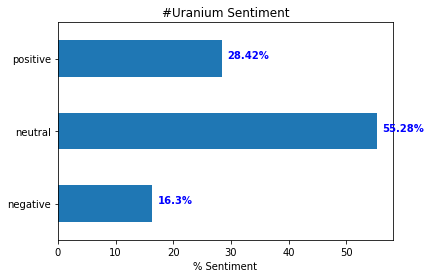

In [11]:
import matplotlib.pyplot as plt

mean_values = df[['negative', 'neutral', 'positive']].mean().apply(lambda x: round(x * 100, 2))

ax = mean_values.plot.barh()
ax.set_xlabel('% Sentiment')
ax.set_title('#Uranium Sentiment')

for i, v in enumerate(mean_values):
    ax.text(v + 1, i, str(v) + '%', color='blue', fontweight='bold')

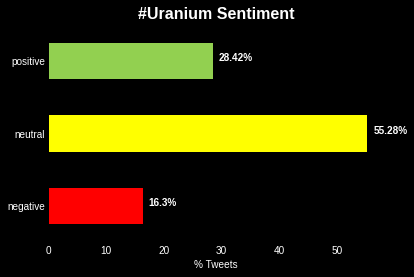

In [17]:
import matplotlib.pyplot as plt

# Set dark style
plt.style.use('dark_background')

# Define color map
colors = ['#FF0000', '#FFFF00',  '#92D050']

mean_values = df[['negative', 'neutral', 'positive']].mean().apply(lambda x: round(x * 100, 2))

ax = mean_values.plot.barh(color=colors)
ax.set_xlabel('% Tweets')
ax.set_title('#Uranium Sentiment', fontsize=16, fontweight='bold')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, v in enumerate(mean_values):
    ax.text(v + 1, i, str(v) + '%', color='white', fontweight='bold')

